- dfnew1['minmax_scale'] = (x-x.min(axis=0)) / (x.max(axis=0)-x,
 min(axis=0)): 데이터프레임 열 이용 최소-최대 척도 변환
- dfnew1[dfnew1['minmax_scale']>0.5].count()['qsec']: 변환값>0.5인 레코드 개수
- scale= MinMaxScaler(): sklearn.preprocessing 라이브러리 MinMaxScaler() 모듈 이용
- d2 = minmax_scale(dfnew2): sklearn.preprocessing 라이브러리 minmax_scale() 모듈 이용

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

df = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', index_col=0)

dfnew1 = df
x = dfnew1['qsec']
dfnew1['minmax_scale'] = (x-x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0))
print('최소-최대 척도 변환값이 0.5보다 큰 레코드의 개수: ', end='')
print(dfnew1[dfnew1['minmax_scale']>0.5].count()['qsec'])

dfnew2 = df
scaler = MinMaxScaler()
d1 = scaler.fit_transform(dfnew2)
dfnew2['minmax_scale1']=d1[:, 6]

d2 = minmax_scale(dfnew2)
dfnew2['minmax_scale2']=d2[:, 6]

print(dfnew2.head())
print('최소-최대 척도 변환값이 0.5보다 큰 레코드의 개수(MinMaxScaler): ', end='')
print(dfnew2[dfnew2['minmax_scale1']>0.5].count()['qsec'])
print('최소-최대 척도 변환값이 0.5보다 큰 레코드의 개수(minmax_scale): ', end='')
print(dfnew2[dfnew2['minmax_scale2']>0.5].count()['qsec'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
최소-최대 척도 변환값이 0.5보다 큰 레코드의 개수: 9
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
model                                                                        
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  minmax_scale  minmax_scale1  minmax_scale2  
model                                                                
Mazda RX4             4      0.233333       0.233333       0.233333  
Mazda RX4 Wag         4      0.300000       0.300000       0.300000  
Datsun 710 

- q25 = df['wt'].quantile(0.25): 자동차 무게의 하위 25% 값
- q75 = df['wt'].quantile(0.75): 자동차 무게의 하위 75% 값
- iqr = q75 - q25: 사분위수 범위
- cond = (df['wt']>=(q75+1.5*iqr)) | (df['wt']<=(q25-1.5*iqr)): 이상값 조건식
- outlier = df[cond].wt: 이상값 조건에 해당되는 자동차 무게

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
자동차 무게의 하위 25% 값: 2.58125
자동차 무게의 하위 75% 값: 3.61
Interquantile Range(사분위수 범위): 1.02875
<class 'pandas.core.series.Series'>
이상값(자동차 무게)에 해당하는 자동차
model
Cadillac Fleetwood     5.250
Lincoln Continental    5.424
Chrysler Imperial      5.345
Name: wt, dtype: float64
이상값(자동차 무게)에 해당하는 자동차의 무게: [5.25  5.424 5.345]
<class 'numpy.ndarray'>


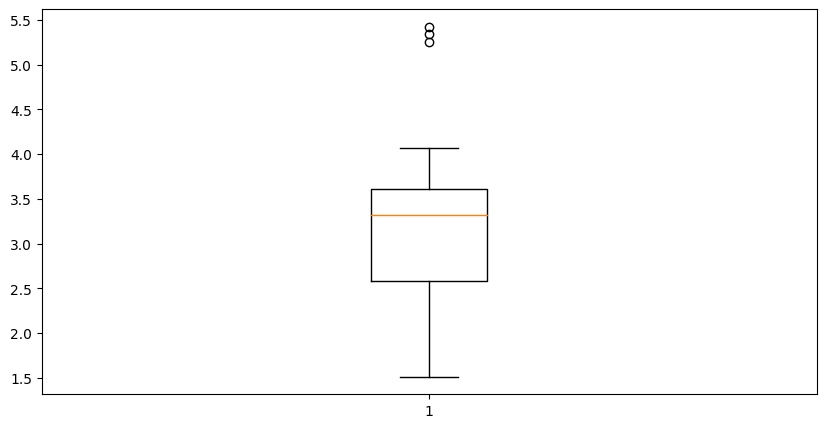

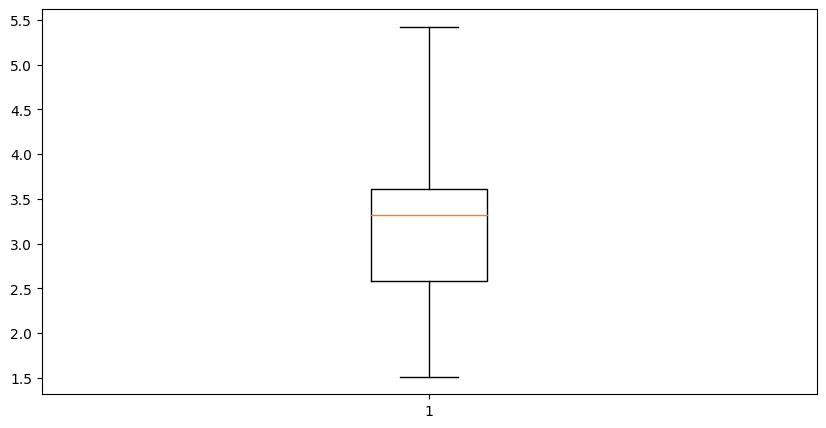

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/work/mtcars.csv', index_col=0)

q25 = df['wt'].quantile(0.25)
print('자동차 무게의 하위 25% 값: ', end=''); print(q25)
q75 = df['wt'].quantile(0.75)
print('자동차 무게의 하위 75% 값: ', end=''); print(q75)

iqr = q75 - q25
print('Interquantile Range(사분위수 범위): ', end=''); print(iqr)

cond = (df['wt']>=(q75+1.5*iqr)) | (df['wt']<=(q25-1.5*iqr))
outlier = df[cond].wt
print(type(outlier))
print('이상값(자동차 무게)에 해당하는 자동차'); print(outlier)
print('이상값(자동차 무게)에 해당하는 자동차의 무게: ', end=''); print(outlier.values)
print(type(outlier.values))

plt.figure(figsize=(10, 5))
plt.boxplot(df['wt'])
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df.wt, whis=2)
plt.show()

- data = irisdata[irisdata['target']==0]: 품종=setosa인 데이터 추출
- df = data.sort_values(['sepal width (cm)'], ascending=False): sepal width 크기 내림차순 정렬
- df = df.reset_index(drop=True): 인덱스 초기화(0부터 인덱스 값 저장)
- gap = df.loc[9,['sepal width (cm)']].values: 상위 10번째 값
- df.iloc[0:10, 1] = gap: 상위 10개 데이터(sepal width)를 10번째 값으로 변경
- df[df['petal length (cm)']>=1.5]['sepal width (cm)'].mean(): petal length가 1.5cm 이상인 붓꽃에 대한 sepal width의 평균

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])

data = irisdata[irisdata['target']==0]
df = data.sort_values(['sepal width (cm)'], ascending=False)
df = df.reset_index(drop=True)

print('Sepal Width 상위 10개 데이터'); print(df.iloc[0:10])
gap = df.loc[9, ['sepal width (cm)']].values
print('sepal width (cm) 상위 10번째 값: ', end=''); print(gap)
print(type(gap))
df.iloc[0:10, 1] = gap
print(df.iloc[0:10])

print('(데이터 변경후)Petal.Length>=1.5 이상인 붓꽃 중 Sepal.Width 평균: ', end='')
print(df[df['petal length (cm)']>=1.5]['sepal width (cm)'].mean())

print('(데이터 변경전)Petal.Length>=1.5 이상인 붓꽃 중 Sepal.Width 평균: ', end='')
print(irisdata[irisdata['petal length (cm)']>=1.5]['sepal width (cm)'].mean())

Sepal Width 상위 10개 데이터
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.7               4.4                1.5               0.4   
1                5.5               4.2                1.4               0.2   
2                5.2               4.1                1.5               0.1   
3                5.8               4.0                1.2               0.2   
4                5.4               3.9                1.7               0.4   
5                5.4               3.9                1.3               0.4   
6                5.1               3.8                1.6               0.2   
7                5.7               3.8                1.7               0.3   
8                5.1               3.8                1.9               0.4   
9                5.1               3.8                1.5               0.3   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
5     0.0  
6     0.0  
7     0.0  

- x = iris.data: 독립변수
- y = iris.target: 종속변수
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42): (훈련, 검증) 데이터 분류(검증데이터=30%)
- scaler = StandardScaler(): 데이터 표준화
- model = SVC(): 서포트벡터머신 모형 정의
- param_grid = {}: 파라미터 값 지정
- grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1): 그리드 탐색
- grid_search.fit(xtrainscaled, trainy): 훈련데이터 적합(학습)
- grid_search.best_params_: 최적 파라미터 값

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

iris = load_iris()
x = iris.data
y = iris.target

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(trainx)
xtestscaled = scaler.fit_transform(testx)

model = SVC()
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.5, 1, 2]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrainscaled, trainy)
print('가장 성능이 우수한 파라미터 값(cost, gamma)', end=''); print(grid_search.best_params_)

bestmodel = grid_search.best_estimator_
accuracy = bestmodel.score(xtestscaled, testy)
print('SVM 모형의 성능(정확도): ', end=''); print(accuracy)

가장 성능이 우수한 파라미터 값(cost, gamma){'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVM 모형의 성능(정확도): 0.9111111111111111


- x=iris.data: 독립변수
- y=label_binarize(iris.target, classes=[0,1,2]): 종속변수(다중 클래스 분류, 이진화 범주형 변환)
- model = SVC(kernel = 'rbf', probability=True, C=1, gamma=0.2, random_state=42).fit(x,y[:,i]): SVM 모형 구축 및 적합
- fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(x)[:,1]): ROC 곡선 작성을 위한 (fpr, tpr) 계산
- auc(fpr[0], tpr[0]): ROC곡선 아랫부분의 면적(AUC) 계산

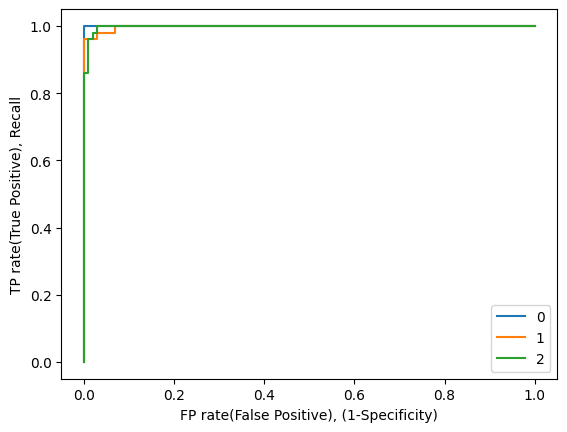

Class=0 분류(setosa) 성능에 대한 AUC: 1.0
Class=1 분류(versicolor) 성능에 대한 AUC: 0.998
Class=2 분류(virginica) 성능에 대한 AUC: 0.998


In [10]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC

iris = load_iris()
x = iris.data
y = label_binarize(iris.target, classes=[0,1,2])
fpr = [None]*3
tpr = [None]*3
thr = [None]*3

for i in range(3):
  model = SVC(kernel = 'rbf', probability=True, C=1, gamma=0.1, random_state=42).fit(x,y[:,i])
  fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(x)[:,1])
  plt.plot(fpr[i], tpr[i], label=i)

plt.xlabel('FP rate(False Positive), (1-Specificity)')
plt.ylabel('TP rate(True Positive), Recall')
plt.legend()
plt.show()

print('Class=0 분류(setosa) 성능에 대한 AUC: ', end=''); print(auc(fpr[0], tpr[0]))
print('Class=1 분류(versicolor) 성능에 대한 AUC: ', end=''); print(auc(fpr[1], tpr[1]))
print('Class=2 분류(virginica) 성능에 대한 AUC: ', end=''); print(auc(fpr[2], tpr[2]))

- np.mean(data['bp_before']): 치료 전 혈압의 평균
- np.mean(data['bp_after']): 치료 후 혈압의 평균
- t, pvalue = stats.ttest_ind(data['bp_after'], data['bp_before'], equal_var = False, alternative='less'): 독립표본 t-검정, t: 검정통계량, pvalue: 유의확률(p-값)

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/work/blood_pressure.csv', index_col=0)
print(data.head())

print('치료전 혈압의 평균(mmHg): ', end=''); print(np.mean(data['bp_before']))
print('치료후 혈압의 평균(mmHg): ', end=''); print(np.mean(data['bp_after']))
print('(치료후-치료전) 혈압의 평균 차이(mmHg):', end=''); print(round(np.mean(data['bp_after'])-np.mean(data['bp_before']), 2))

t, pvalue = stats.ttest_ind(data['bp_after'], data['bp_before'], equal_var = False, alternative='less')
print('t-검정통계량: ', end=''); print(t)
print('유의확률: ', end=''); print(pvalue)
alpha = 0.05
if pvalue < alpha:
  print('(귀무가설 기각): 치료 후의 혈압이 감소하여 치료 효과가 있다.')
else:
  print('(귀무가설 채택): 치료 후의 혈압이 큰 변화가 없어 치료 효과가 없다.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          sex agegrp  bp_before  bp_after
patient                                  
1        Male  30-45        143       153
2        Male  30-45        163       170
3        Male  30-45        153       168
4        Male  30-45        153       142
5        Male  30-45        146       141
치료전 혈압의 평균(mmHg): 156.45
치료후 혈압의 평균(mmHg): 151.35833333333332
(치료후-치료전) 혈압의 평균 차이(mmHg):-5.09
t-검정통계량: -3.066983681903628
유의확률: 0.001212124659880966
(귀무가설 기각): 치료 후의 혈압이 감소하여 치료 효과가 있다.


- x = data[['mileage', 'mpg', 'engineSize']]: 독립변수[마일리지(주행거리), 연비, 엔진 크기]
- y = data['price']: 종속변수(차량 가격)
- fit = ols('y ~ x', data=data).fit(): 다중 선형회귀 분석 모형 구축 및 적합
- fit.tvalues: 독립변수별 t-검정통계량
- fit.pvalues: 독립변수별 p-value
- fit.rsquared: 결정계수(R-squared)

In [12]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import ols
data = pd.read_csv('/content/drive/MyDrive/work/carprice.csv', header=0, index_col=0)
print(data.head())

x = data[['mileage', 'mpg', 'engineSize']]
y = data['price']
fit = ols('y ~ x', data=data).fit()
print(fit.summary())

print('T-검정통계량: ', end=''); print(fit.tvalues)
print('p-value: ', end=''); print(fit.pvalues)
print('R-squared: ', end=''); print(round(fit.rsquared, 4))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       year transmission  mileage fuelType  tax   mpg  engineSize  price
model                                                                   
 A1    2017       Manual    15735   Petrol  150  55.4         1.4  12500
 A6    2016    Automatic    36203   Diesel   20  64.2         2.0  16500
 A1    2016       Manual    29946   Petrol   30  55.4         1.4  11000
 A4    2017    Automatic    25952   Diesel  145  67.3         2.0  16800
 A3    2019       Manual     1998   Petrol  145  49.6         1.0  17300
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     8825.
Date:                Wed, 19 Jun 2024   Prob

- dfnew = air.dropna(): 결측치 제외
- q6 = dfnew['Ozone'].quantile(0.4): Ozone 항목에 대한 상위 60%(하위 40%) 분위수

In [13]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
air = pd.read_csv('/content/drive/MyDrive/work/airquality.csv', index_col=0)

print(air.head())
print(air.describe())
print(air.shape)
print(air.info())
print(air.dtypes)

dfnew = air.dropna()
print(dfnew.head())
q6 = dfnew['Ozone'].quantile(0.4)
print('Ozone 상위 60%(하위 40%) 사분위 값: ', end=''); print(q6)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
5    NaN      NaN  14.3    56      5    5
            Ozone     Solar.R        Wind        Temp       Month         Day
count  116.000000  146.000000  153.000000  153.000000  153.000000  153.000000
mean    42.129310  185.931507    9.957516   77.882353    6.993464   15.803922
std     32.987885   90.058422    3.523001    9.465270    1.416522    8.864520
min      1.000000    7.000000    1.700000   56.000000    5.000000    1.000000
25%     18.000000  115.750000    7.400000   72.000000    6.000000    8.000000
50%     31.500000  205.000000    9.700000   79.000000    7.000000   16.000000
75%     63.250000  258.750000   11.500000   85.000000    8.000000   23.00

- df = dfnew[dfnew['Month']==5]: Month=5월인 데이터 추출
- m = df['Ozone'].mean(): 5월 Ozone의 평균
- df[df['Ozone']>m].Day.count(): 5월 Ozone의 평균보다 큰 값을 가지는 일수(Day)

In [14]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
air = pd.read_csv('/content/drive/MyDrive/work/airquality.csv', index_col=0)

dfnew = air.dropna()
df = dfnew[dfnew['Month']==5]
print('5월 측정 자료'); print(df.head())
print('5월 측정 자료 개수: ', end=''); print(df.shape)
m = df['Ozone'].mean()
print('5월 Ozone 량 평균: ', end=''); print(m)
print('5월 Ozone의 평균보다 큰 값을 가지는 일수(Day): ', end=''); print(df[df['Ozone']>m].Day.count())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
5월 측정 자료
   Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
7   23.0    299.0   8.6    65      5    7
5월 측정 자료 개수: (24, 6)
5월 Ozone 량 평균: 24.125
5월 Ozone의 평균보다 큰 값을 가지는 일수(Day): 8


- dfnan = air.isnull().sum(): 항목별 결측치 개수
- df_sort1 = dfnan.sort_values(): 결측치 개수 오름차순 정렬
- df_sort2 = dfnan.sort_values(ascending=False): 결측치 개수 내림차순 정렬
- df_sort2.index[0]: 결측치가 가장 많은 항목
- df_sort2[0]: 결측치가 가장 많은 항목의 결측치 개수

In [15]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
air = pd.read_csv('/content/drive/MyDrive/work/airquality.csv', index_col=0)

print('Airquality 데이터프레임 크기: ', end=''); print(air.shape)
dfnan = air.isnull().sum()
print(dfnan)
print(type(dfnan))
df_sort1 = dfnan.sort_values()
print('<<<결측값 오름차순 정렬>>>'); print(df_sort1)
df_sort2 = dfnan.sort_values(ascending=False)
print('!!!결측값 내림차순 정렬!!!'); print(df_sort2)

print('결측값이 가장 많은 항목: ', end=''); print(df_sort2.index[0])
print('결측값이 가장 많은 항목의 결측치 개수: ', end=''); print(df_sort2[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Airquality 데이터프레임 크기: (153, 6)
Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64
<class 'pandas.core.series.Series'>
<<<결측값 오름차순 정렬>>>
Wind        0
Temp        0
Month       0
Day         0
Solar.R     7
Ozone      37
dtype: int64
!!!결측값 내림차순 정렬!!!
Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64
결측값이 가장 많은 항목: Ozone
결측값이 가장 많은 항목의 결측치 개수: 37


- x=df.drop(['Reached.on.Time_Y.N'], axis='columns').to_numpy(): 독립변수 저장(넘파이 배열)
- y=df['Reached.on.Time_Y.N'].to_numpy(): 종속변수 저장(넘파이 배열)
- trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55): (훈련, 검증) 데이터 랜덤 추출(검증데이터=30%)
- model = RandomForestClassifier(n_estimators=100, random_state=42): 랜덤 포레스트 모형 구축[트리의 개수(n_estimators)=100]
- model.fit(trainx, trainy): 모형 훈련(적합)
- predictions = model.predict(testx): 검증 데이터를 이용한 예측
- conf = confusion_matrix(testy, predictions): 혼동행렬 작성
- classification_report(testy, predictions): 성능평가 지표 계산

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Warehouse_block'] = df['Warehouse_block'].map({'A':0, 'B':1, 'C':2, 'D':4, 'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight':0, 'Road':1, 'Ship':2})
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')

x = df.drop(['Reached.on.Time_Y.N'], axis='columns').to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
print(predictions[:10])
print('Random Forest (랜덤포레스트) 분류 모형 성능(정확도): ', end=''); print(accuracy_score(testy, predictions))
print('$$$ Confusion Matrix, 혼동행렬 $$$')
conf = confusion_matrix(testy, predictions); print(conf)
print('*** 분류 분석 모형 성능평가 지표 ***')
print(classification_report(testy, predictions))
print('!!! 특성 중요도 !!!')
print(model.feature_importances_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0 1 0 0 1 0 0 1 1 1]
Random Forest (랜덤포레스트) 분류 모형 성능(정확도): 0.6654545454545454
$$$ Confusion Matrix, 혼동행렬 $$$
[[ 921  387]
 [ 717 1275]]
*** 분류 분석 모형 성능평가 지표 ***
              precision    recall  f1-score   support

           0       0.56      0.70      0.63      1308
           1       0.77      0.64      0.70      1992

    accuracy                           0.67      3300
   macro avg       0.66      0.67      0.66      3300
weighted avg       0.69      0.67      0.67      3300

!!! 특성 중요도 !!!
[0.0499468  0.03181902 0.05642875 0.06001004 0.1812712  0.05556255
 0.03212997 0.02584354 0.20837884 0.29860929]


- f1_score(result['Actual'], result['Predict']): F1-score
- accuracy_score(result['Actual'], result['Predict']): 정확도(Accuracy)
- precision_score(result['Actual'], result['Predict']): 정밀도(Precision)
- recall_score(result['Actual'], result['Predict']): 재현율(Recall, 민감도, Sensitivity), Hit Ratio
- roc_curve(result['Actual'], result['Predict']): ROC 곡선(Receiver Operating Characteristic Curve)
- auc(fpr, tpr): AUC 값(Area Under the ROC Curve)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
*** F1 Score 계산 모듈 이용 ***
F1-score: 0.6978653530377668
*** Accuracy 계산 모듈 이용 ***
Accuracy (정확도): 0.6654545454545454
*** Precision 계산 모듈 이용 ***
Precision (정밀도): 0.7671480144404332
*** Recall (재현율) 계산 모듈 이용: Recall (재현율): 0.6400602409638554
^^^ ROC Curve ^^^


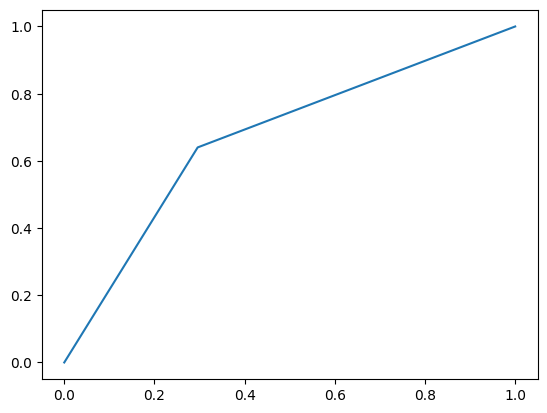

** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: 0.672094340665414


In [20]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('/content/drive/MyDrive/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Warehouse_block'] = df['Warehouse_block'].map({'A':0, 'B':1, 'C':2, 'D':4, 'F':4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight':0, 'Road':1, 'Ship':2})
df['Product_importance'] = df['Product_importance'].map({'low':0, 'medium':1, 'high':2})
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df.drop(['Reached.on.Time_Y.N'], axis='columns').to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(trainx, trainy)
predictions = model.predict(testx)
result = pd.DataFrame(np.array([testy, predictions]).transpose(), columns=['Actual', 'Predict'])
print('*** F1 Score 계산 모듈 이용 ***')
print('F1-score: ', end=''); print(f1_score(result['Actual'], result['Predict']))
print('*** Accuracy 계산 모듈 이용 ***')
print('Accuracy (정확도): ', end=''); print(accuracy_score(result['Actual'], result['Predict']))
print('*** Precision 계산 모듈 이용 ***')
print('Precision (정밀도): ', end=''); print(precision_score(result['Actual'], result['Predict']))
print('*** Recall (재현율) 계산 모듈 이용: ', end='');
print('Recall (재현율): ', end='');
print(recall_score(result['Actual'], result['Predict']))
print('^^^ ROC Curve ^^^')
fpr, tpr, thresholds = roc_curve(result['Actual'], result['Predict'])
plt.plot(fpr, tpr); plt.show()
print('** AUC, Area under ROC Curve, ROC 곡선 아래부분의 면적: ', end=''); print(auc(fpr, tpr))

- np.mean(data['h_before']): 치료 전 키의 평균
- np.mean(data['h_after']): 치료 후 키의 평균
- t, pvalue = stats.ttest_ind(data['h_after'], data['h_before'], equal_var=False, alternative='greater'): 독립표본 t-검정, t: 검정통계량, pvalue: 유의확률(p-값)

In [21]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/work/height.csv', index_col=0)
print(data.head())
print('치료전 키의 평균(cm): ', end=''); print(np.mean(data['h_before']))
print('치료후 키의 평균(cm): ', end=''); print(np.mean(data['h_after']))
print('(치료후-치료전) 키의 평균 차이(cm):', end=''); print(round(np.mean(data['h_after'])-np.mean(data['h_before']), 2))
t, pvalue = stats.ttest_ind(data['h_after'], data['h_before'], equal_var=False, alternative='greater')
print('t-검정통계량: ', end=''); print(t)
print('유의확률: ', end=''); print(pvalue)
alpha = 0.05
if pvalue < alpha:
  print('(귀무가설 기각): 치료 후의 키가 감소하여 치료 효과가 있다.')
else:
  print('(귀무가설 채택): 치료 후의 키가 큰 변화가 없어 치료 효과가 없다.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          sex  age  h_before  h_after
student                              
1        Male    5       117      121
2        Male    5       108      109
3        Male    6       105      106
4        Male    5        89      114
5        Male    5       101      103
치료전 키의 평균(cm): 104.77272727272727
치료후 키의 평균(cm): 115.04545454545455
(치료후-치료전) 키의 평균 차이(cm):10.27
t-검정통계량: 2.016930907527647
유의확률: 0.02511512676763899
(귀무가설 기각): 치료 후의 키가 감소하여 치료 효과가 있다.


In [24]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
df = pd.read_csv('/content/drive/MyDrive/work/recordmath.csv', encoding='euc-kr')
dfmale = df[df['sex'] == 'Male']
dffemale = df[df['sex'] == 'Female']
noofmale = len(dfmale)
nooffemale = len(dffemale)
print('남성의 수: ', end=''); print(noofmale)
print('여성의 수: ', end=''); print(nooffemale)
x1 = len(dfmale[dfmale['academy']==1])
x2 = len(dffemale[dffemale['academy']==1])
print('남성들 중 학원에 다니는 학생의 수: ', end=''); print(x1)
print('여성들 중 학원에 다니는 학생의 수: ', end=''); print(x2)
print('학원에 다니는 학생의 비율/남성: ', end=''); print(x1/noofmale)
print('학원에 다니는 학생의 비율/여성: ', end=''); print(x2/nooffemale)
observed = [[[x1, x2], [noofmale-x1, nooffemale-x2]]]
print(observed)
chi, pvalue, dof, expect = stats.chi2_contingency(observed)
print('카이제곱 검정 통계량: ', end=''); print(round(chi, 3))
print('p-value(유의확률): ', end=''); print(round(pvalue, 4))
print('기대 빈도수: '); print(expect)

alpha = 0.5
if pvalue < alpha:
  print('(남성, 여성)에 대한 학원에 다니는 비율의 차이가 유의미하게 존재합니다. (귀무가설 기각)')
else:
  print('(남성, 여성)에 대한 학원에 다니는 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
남성의 수: 15
여성의 수: 15
남성들 중 학원에 다니는 학생의 수: 7
여성들 중 학원에 다니는 학생의 수: 7
학원에 다니는 학생의 비율/남성: 0.4666666666666667
학원에 다니는 학생의 비율/여성: 0.4666666666666667
[[[7, 7], [8, 8]]]
카이제곱 검정 통계량: 0.0
p-value(유의확률): 1.0
기대 빈도수: 
[[[7. 7.]
  [8. 8.]]]
(남성, 여성)에 대한 학원에 다니는 비율의 차이가 유의미하지 않습니다. (귀무가설 채택)
